In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

import os

In [2]:
df = pd.read_csv('data/train_bike_sharing.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

In [3]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


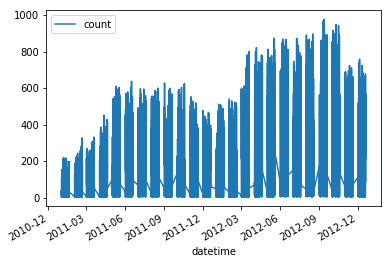

In [4]:
df.plot(x='datetime', y='count') # quick plot

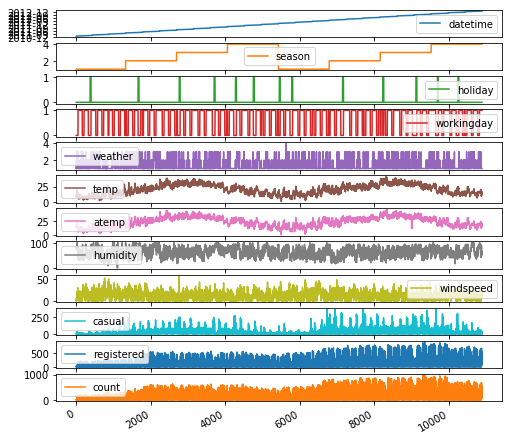

In [5]:
# plot all columns as subplots
df.plot(subplots = True, figsize = (8, 8));
plt.legend(loc = 'best')
plt.show()

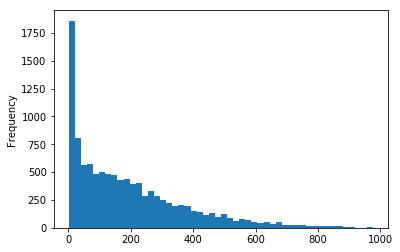

In [6]:
df['count'].plot.hist(bins=50) # histogram

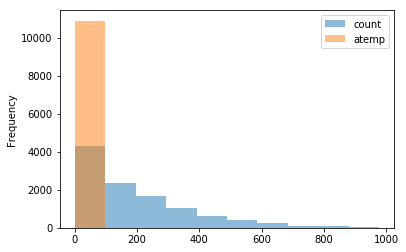

In [7]:
df[['count', 'atemp']].plot.hist(alpha=0.5)

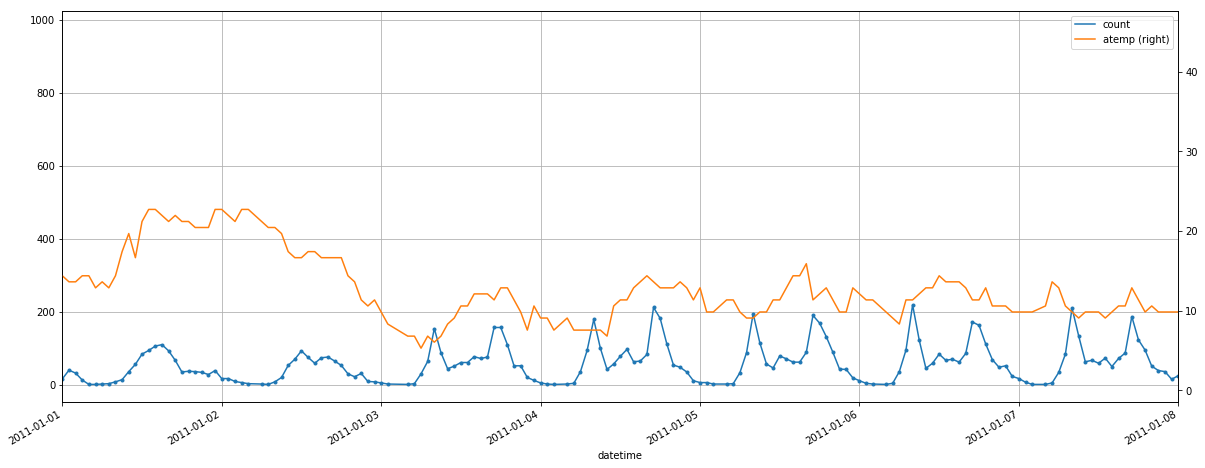

In [8]:
# plotting with a bigger boilerplate:

fig, ax = plt.subplots() # this returns objects that will be handy later on

# ax=ax used to plot both columns on one plot
# style used to change from standard line plot to dots (ms == marker size)
# secondary_y=True uses right axis for plotting (more axes can be made, but tricky)
df.plot(x='datetime', y='count', ax=ax, style='o-', ms=3, grid=True) 
df.plot(x='datetime', y='atemp', ax=ax, secondary_y=True, grid=True)

xmin = df['datetime'].min()
xmax = xmin + pd.to_timedelta('7d')
ax.set_xlim([xmin,xmax]) # setting limits on x-axis

# ax.set_ylim([0,600]) # limits on y-axis can also be set
# ax.right_ax.set_ylim(0,30)

fig.set_size_inches(20, 8) # changing the size of a figure

plt.show() # what it sounds like

# cleanup - important if generating many figures (e.g. in a loop)
plt.gcf().clear()
mpl.pyplot.close("all")

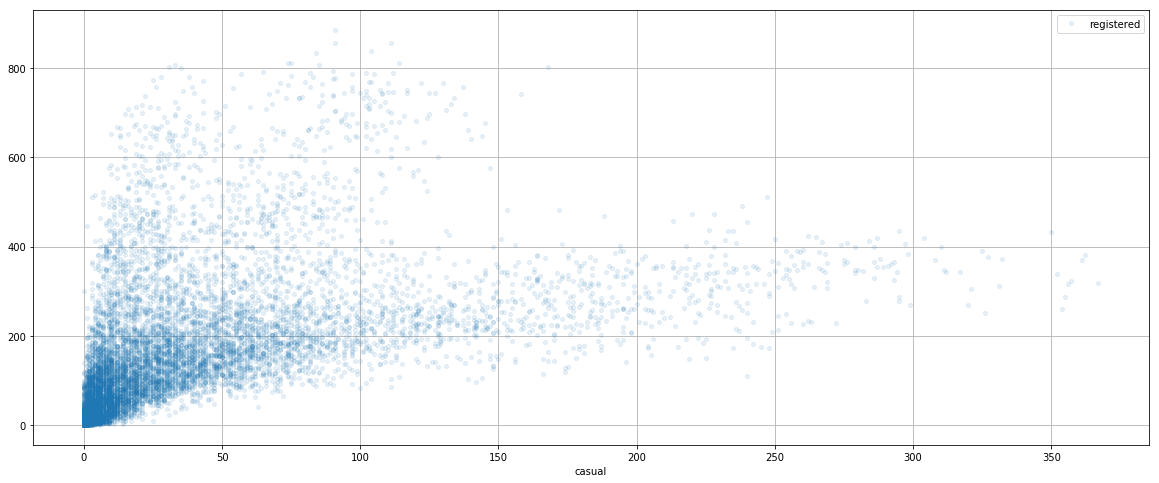

In [9]:
# standard plot used as a scatterplot

fig, ax = plt.subplots()

df.plot(x='casual', y='registered', ax=ax, style='o', ms=4, alpha=0.1, grid=True)

fig.set_size_inches(20, 8)

plt.show()

plt.gcf().clear()
mpl.pyplot.close("all")

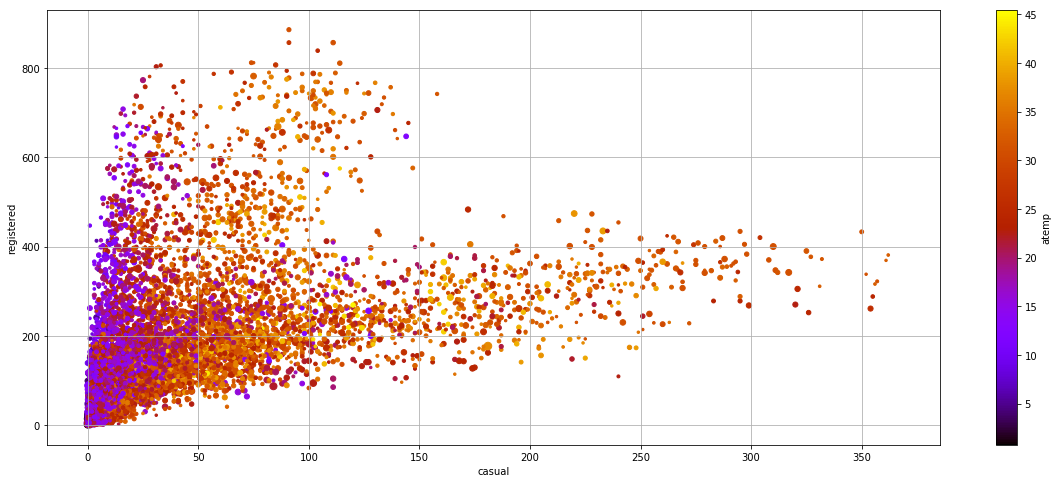

In [10]:
# proper scatterplot has nice options:
# c='col' use 'col' to determine colors of the markers
# s='col' use 'col' to determine size of the markers

fig, ax = plt.subplots() # returns objects that will be handy later on

df.plot.scatter(x='casual', y='registered', c='atemp', cmap='gnuplot', s=list(df['windspeed']), ax=ax, grid=True)

fig.set_size_inches(20, 8)

plt.show()

plt.gcf().clear()
mpl.pyplot.close("all")

In [11]:
# but it doesn't work with datetime/timestamp
df.plot.scatter(x='datetime', y='registered', c='atemp', cmap='gnuplot', s=1, ax=ax, grid=True)

ValueError: scatter requires x column to be numeric

In [ ]:
# unix_time is fine, but values are large: it can be more sensible to play with months, weeks, etc.

df['unix_time'] = df['datetime'] - pd.to_datetime('1970-01-01 00:00:00')
df['unix_time'] = df['unix_time'].map(lambda x: x.total_seconds())

df.plot.scatter(x='unix_time', y='registered', c='atemp', cmap='gnuplot', s=1, grid=True)

In [ ]:
# saving plots

# preparing path
plot_folder = 'plots'
plot_file = 'blabla.png' # use .png for scatter plots; .svg is good otherwise
plot_path = os.path.join(plot_folder, plot_file)

fig, ax = plt.subplots()

df.plot.scatter(x='casual', y='registered', c='atemp', cmap='gnuplot', s=1, ax=ax, grid=True)

fig.set_size_inches(20, 8)

plt.savefig(plot_path, dpi=300)
# 
plt.gcf().clear()
mpl.pyplot.close("all")